<a href="https://colab.research.google.com/github/Ogari1/final_project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive in your Colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import necessary libraries, Load and inspect dataset
import pandas as pd
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data= pd.read_excel("/content/drive/MyDrive/students/students.xlsx")

data.head()


,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6972 non-null   object 
 1   label   6980 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.2+ KB


In [4]:
data.describe()

,label
count,6980.000000
mean,0.105014
std,0.306594
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
#Check for missing values
data.isnull().sum()

text     10
label     2
dtype: int64

<Axes: ylabel='count'>

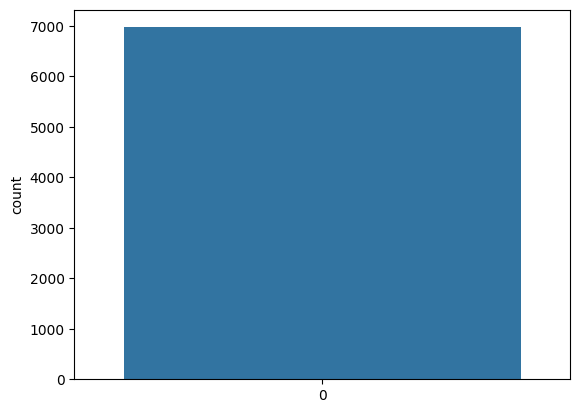

In [7]:
#DATA PREPROCESSING
data = data.dropna()
#shuffling to avoid any potential bias or patterns in the original order of data
data = data.sample(frac = 1)
#creating a countplot
import seaborn as sns
sns.countplot(data.label)

In [8]:
pip install spacy

In [9]:
##text preprocessing for natural language processing (NLP)
import nltk #library for NLP and text processing
from nltk.corpus import stopwords # imports a list of common stopwords
from nltk.stem.porter import PorterStemmer #performs word stemming(reducing words to their root form)
from nltk.stem import WordNetLemmatizer #for lemmatization
import spacy #for tokenization, part-of-speech tagging, named entity recognition
import string
from bs4 import BeautifulSoup #for web scraping and parsing

nltk.download('wordnet') #Python library for working with human language data


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
import re
import string
def text_transformation(text):
    text = text.lower() #Converts all text to lowercase
    text = re.sub('\[.*?\]', '', text) #remove text within square brackets
    text = re.sub("\\W"," ",text) # Replaces non-word characters with spaces
    text = re.sub('https?://\S+|www\.\S+', '', text) #Removes URLs or web links
    text = re.sub('<.*?>+', '', text) #Removes HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #Removes standard punctuation marks
    text = re.sub('\n', '', text) #Removes newline characters
    text = re.sub('\w*\d\w*', '', text) #Removes words that contain digits
    return text

In [11]:
#contraction_mapping (map common English language contractions to their expanded forms)
# Define the contraction mapping

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

# Replace contractions with expanded forms
for contraction, expansion in contraction_mapping.items():
    text = data.replace(contraction, expansion)

print(text)

                                                   text  label
873   homecoming holiday, friends, miss my extra money     0.0
73    Urmi has a fever, I'm already sad and restless...    1.0
3349  Dasom here who is there?? (â•â˜žÂ´à¸´âˆ€Â´à¸´)...    0.0
4139  WOYYY I'M VERY INTERESTED WITH THE RESULTS REA...    0.0
6927          Where do you buy a good plisket pashmina?    0.0
...                                                 ...    ...
4585  Isn't it weird, going out with a friend who fi...    0.0
2005  Taking care of 2 special children, you have to...    0.0
2193  Btw, is it really not available or what, I'm l...    0.0
5969  If I withdraw the seller's balance this mornin...    0.0
6832  â€œI love you with all my heart! If you stay h...    0.0

[6970 rows x 2 columns]


In [12]:
#Cleaning
def text_cleaner(text):
    if isinstance(text, str):
        newString = text.lower() #Converts the input text to lowercase
        newString = re.sub(r'\([^)]*\)', '', newString) #Removes text enclosed in parentheses.
        newString = ' '.join([contraction_mapping.get(t, t) for t in newString.split(" ")])  #Expands contractions in the text using the contraction_mapping dictionary
        newString = re.sub(r"'s\b","",newString) #Removes possessive markers
        newString = re.sub(r"[^a-zA-Z\s]", "", newString) #Removes non-alphabet characters
        newString = re.sub('"','', newString) # Removes double quotes from the text.
        newString = re.sub('[m]{2,}', 'mm', newString) #Normalizes repeated letter sequences
        newString = BeautifulSoup(newString, "lxml").text #Removes HTML tags from the input text

        return newString
    else:
        return ""

data['cleaned'] = data["text"].apply(text_cleaner)


In [13]:
pip install wordCloud

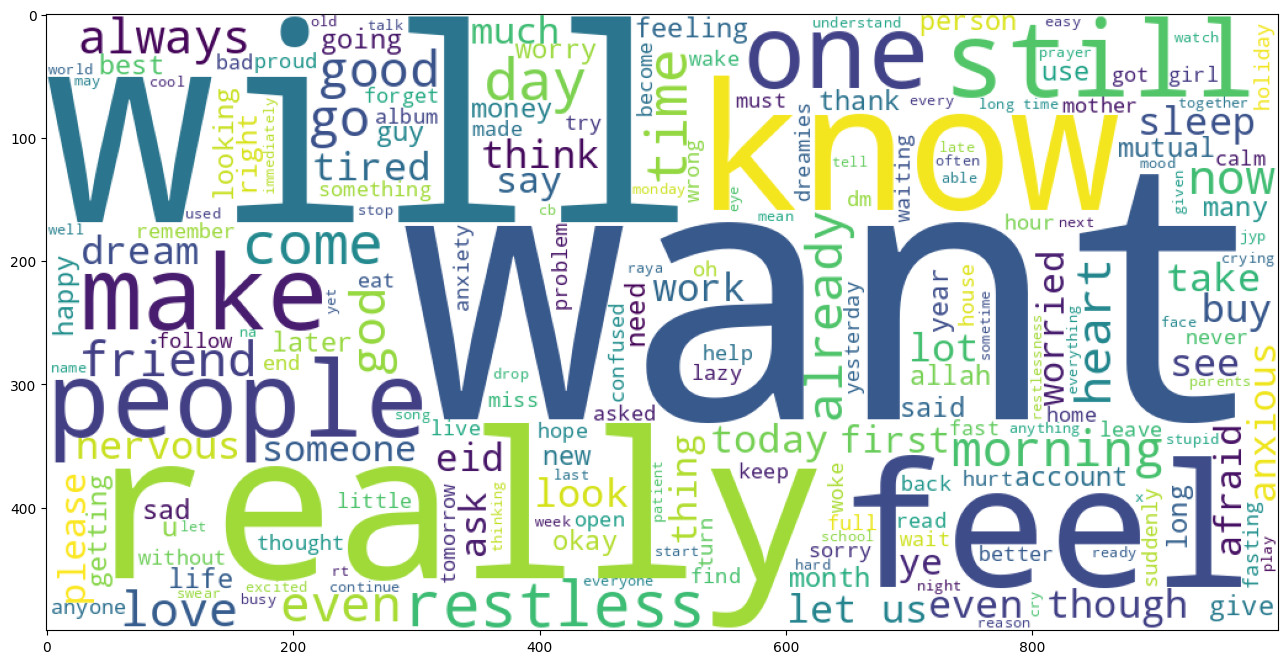

In [14]:
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in data['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [15]:
data.tail()

,text,label,cleaned
4585,"Isn't it weird, going out with a friend who fi...",0.0,is not it weird going out with a friend who fi...
2005,"Taking care of 2 special children, you have to...",0.0,taking care of special children you have to b...
2193,"Btw, is it really not available or what, I'm l...",0.0,btw is it really not available or what i am lo...
5969,If I withdraw the seller's balance this mornin...,0.0,if i withdraw the seller balance this morning ...
6832,â€œI love you with all my heart! If you stay h...,0.0,i love you with all my heart if you stay here ...


In [16]:
#Data splitting
X = data.cleaned
y = data.label

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Identify and remove rows with missing target values
indices_to_drop = np.isnan(y)
X = X[~indices_to_drop]
y = y[~indices_to_drop]

vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))

X_cv =vect.fit_transform(X).toarray()


X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 1,stratify = y)

Accuracy : 0.9863701578192252

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1248
         1.0       0.98      0.88      0.93       146

    accuracy                           0.99      1394
   macro avg       0.99      0.94      0.96      1394
weighted avg       0.99      0.99      0.99      1394

   ------------ Confusion Matrix -------------- 


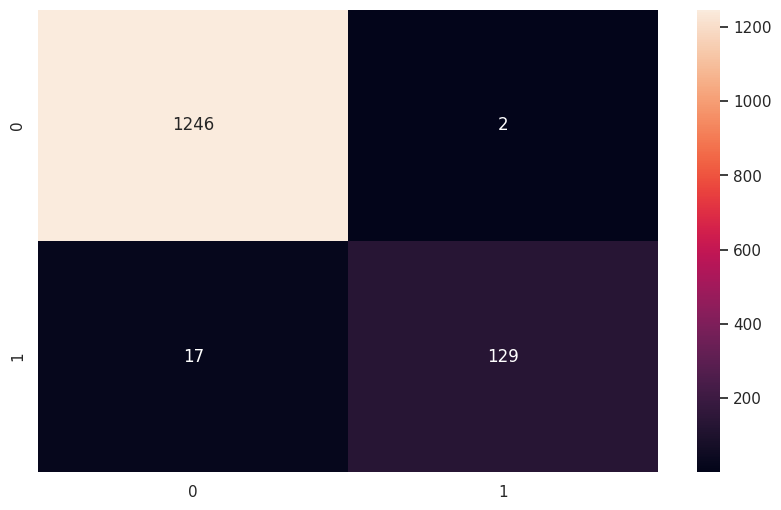

In [17]:
#Model selection and training
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns


def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

#Logistic Regression(linear model used for binary classification)
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
performance_eval(clf_lr,X_test)

Accuracy : 0.9383070301291249

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      1248
         1.0       0.66      0.84      0.74       146

    accuracy                           0.94      1394
   macro avg       0.82      0.89      0.85      1394
weighted avg       0.95      0.94      0.94      1394

   ------------ Confusion Matrix -------------- 


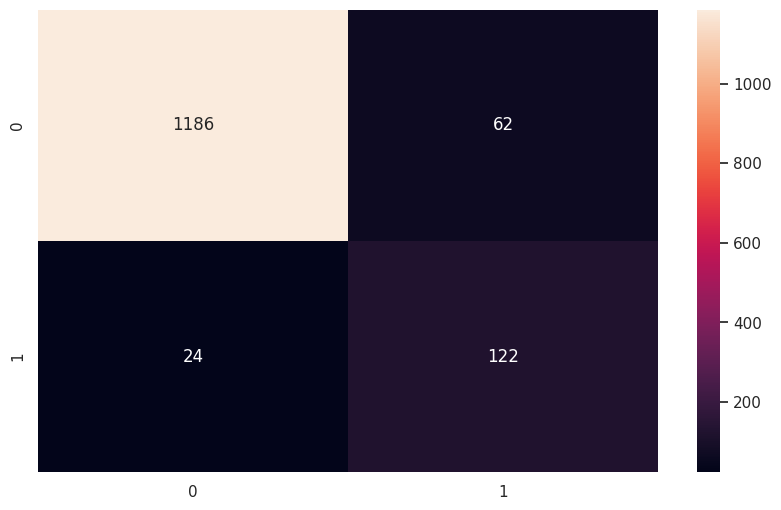

In [21]:
#Naive Bayes(Solves multiclass prediction problems)
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
performance_eval(clf_nb,X_test)

Accuracy : 0.960545193687231

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1248
         1.0       1.00      0.62      0.77       146

    accuracy                           0.96      1394
   macro avg       0.98      0.81      0.87      1394
weighted avg       0.96      0.96      0.96      1394

   ------------ Confusion Matrix -------------- 


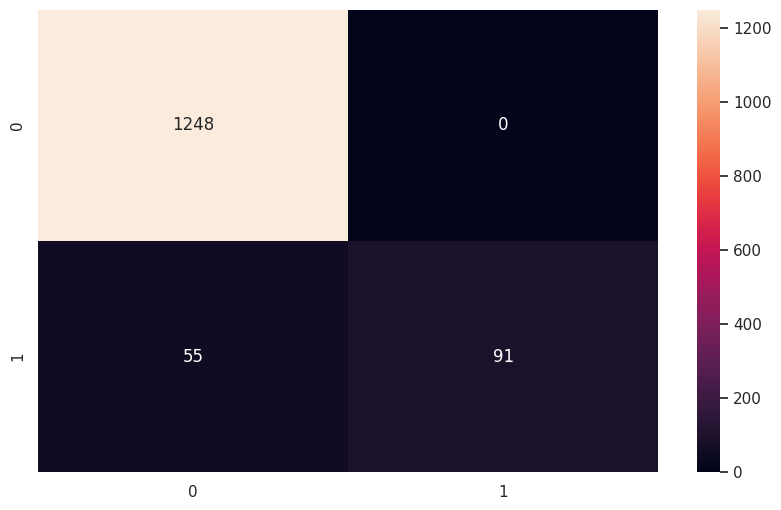

In [23]:
#Support vector machines(SVM, Finds the optimal decision boundary between classes)
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
performance_eval(clf_svm,X_test)

Accuracy : 0.9849354375896701

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1248
         1.0       0.93      0.92      0.93       146

    accuracy                           0.98      1394
   macro avg       0.96      0.96      0.96      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


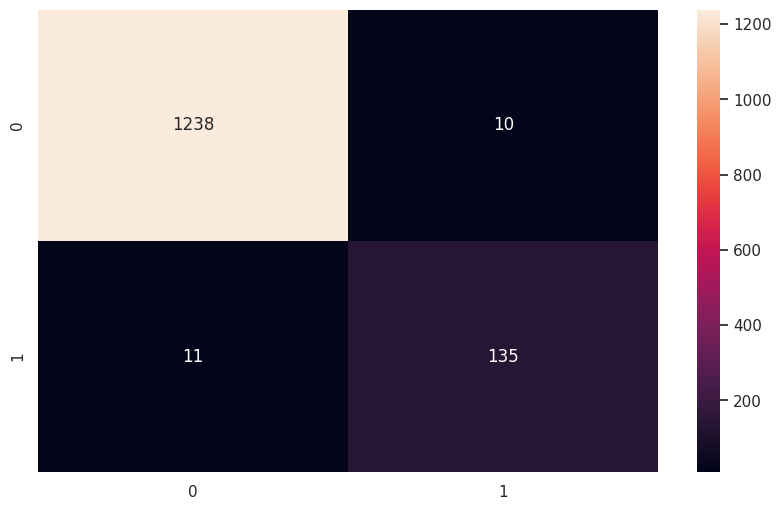

In [22]:
#Decision Tree(Tree based model that recursively splits the data based of feature valiues)
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
performance_eval(clf_dt,X_test)

Accuracy : 0.9139167862266858

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.95      1248
         1.0       0.84      0.22      0.35       146

    accuracy                           0.91      1394
   macro avg       0.88      0.61      0.65      1394
weighted avg       0.91      0.91      0.89      1394

   ------------ Confusion Matrix -------------- 


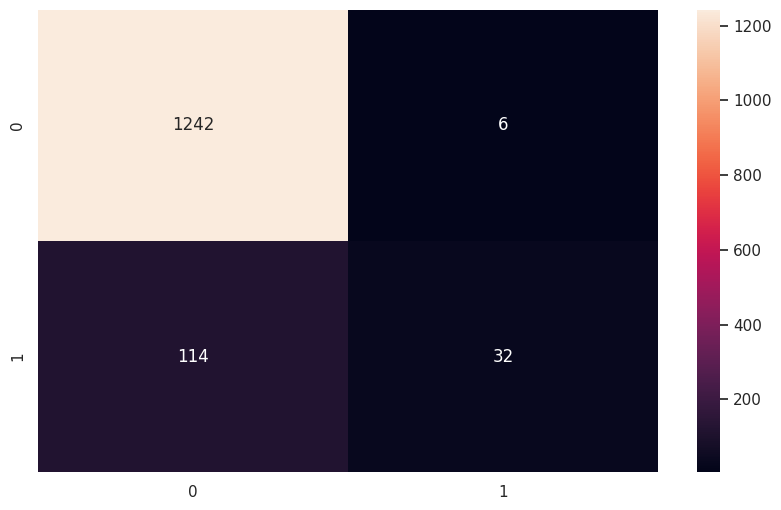

In [19]:
#KNeighborsClassifier(Makes highly accurate predictions)
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
performance_eval(clf_knn,X_test)

Accuracy : 0.9806312769010043

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1248
         1.0       0.98      0.83      0.90       146

    accuracy                           0.98      1394
   macro avg       0.98      0.91      0.94      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


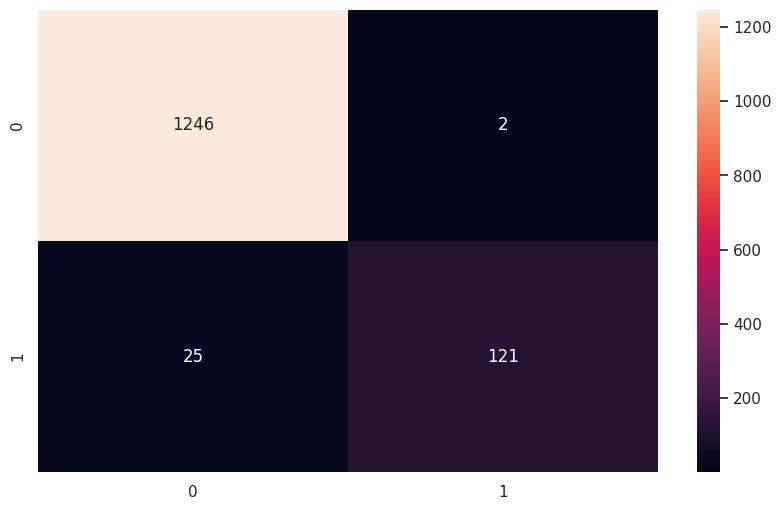

In [20]:
#Random forest(Combines multiple decision trees to make predictions)
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
performance_eval(clf_rf,X_test)

Accuracy : 0.9741750358680057

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1248
         1.0       1.00      0.75      0.86       146

    accuracy                           0.97      1394
   macro avg       0.99      0.88      0.92      1394
weighted avg       0.97      0.97      0.97      1394

   ------------ Confusion Matrix -------------- 


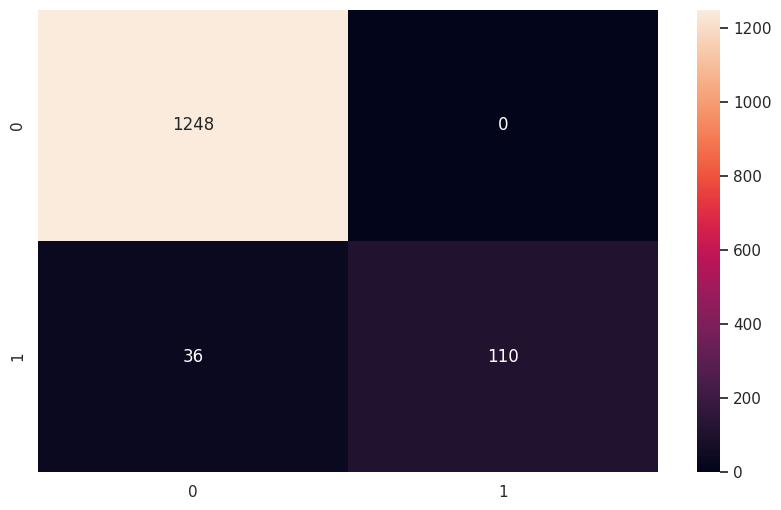

In [24]:
#Ensemble
from sklearn.ensemble import VotingClassifier

# Rest of your code

voting_clf = VotingClassifier(estimators=[('SVC', clf_svm),
                                          ('LogReg', clf_lr),
                                          ('RF', clf_rf),
                                          ('KNN',clf_knn),
                                          ('NB',clf_nb),
                                          ('DT',clf_dt)
                                         ],
                              voting='hard'
                             )
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

In [25]:
#Saving the Best Model

import pickle
filename = 'CV_BestModel.sav'
pickle.dump(voting_clf, open(filename, 'wb'))

In [26]:
text = "He is// A shorttempered and restless!! guy."

In [27]:
clean_text = text_cleaner(text)

In [28]:
clean_text

'he is a shorttempered and restless guy'

In [29]:
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

In [30]:
output = {0:"No Anxiety/Depression",
          1:"Anxiety/Depression"}
print(output[single_prediction])

Anxiety/Depression
